First of all, let us start by importing the necessory packages.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Let us first retrieve the dataset from the statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
df = sm.datasets.fair.load_pandas().data

In [ ]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Now let us make the affair column such a way that it is binomial

In [ ]:
def change_affair_value(val):
  if val == 0:
    return 0
  else:
    return 1

In [ ]:
df['affairs'] = df['affairs'].apply(change_affair_value)

In [ ]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


### Train Test Split

In [ ]:
# Defining the input and output
X = df.drop(['affairs'], axis=1)
Y = df['affairs']

In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state=687)

## **Data Visualization**

In [ ]:
# let us see the details of this dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 2406 to 462
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    2164 non-null   float64
 1   age              2164 non-null   float64
 2   yrs_married      2164 non-null   float64
 3   children         2164 non-null   float64
 4   religious        2164 non-null   float64
 5   educ             2164 non-null   float64
 6   occupation       2164 non-null   float64
 7   occupation_husb  2164 non-null   float64
dtypes: float64(8)
memory usage: 152.2 KB


In [ ]:
df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
affairs,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


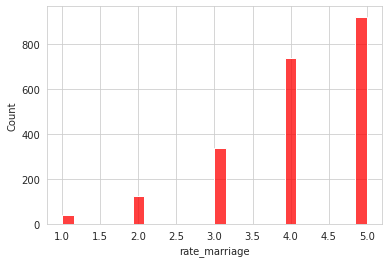

In [ ]:
# Let us see the distribution of marriage type throughout the dataset
sns.histplot(x=X_train['rate_marriage'], color='red')

Most of the couples had very good marriage life

Now let  us see the rate of couples that had affairs and that hadn't and compare it with rate of marriage.

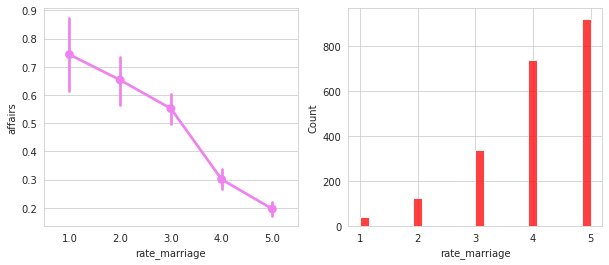

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10, 4))
sns.pointplot(x=X_train['rate_marriage'], y=Y_train, color='violet', ax=axis[0])
sns.histplot(X_train['rate_marriage'], ax=axis[1], color='red')
axis[0].set_ylabel('affairs')
plt.show()

Marriage that rates 3 and below had higher rates of affairs. Out off this, the number of samples with rate_marriage as 1 is very less.

Now let us see the same for number of years after marriage

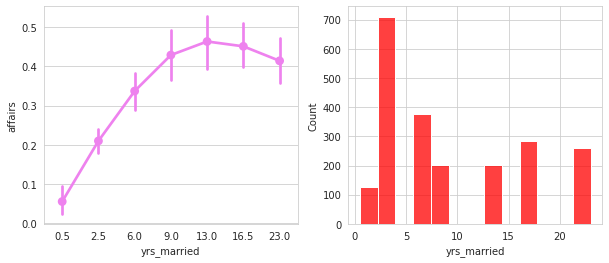

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10, 4))
sns.pointplot(x=X_train['yrs_married'], y=Y_train, color='violet', ax=axis[0])
sns.histplot(X_train['yrs_married'], ax=axis[1], color='red')
axis[0].set_ylabel('affairs')
plt.show()

It can be viewed that with increasing number of years married, the rate of affairs increase.

Number of children, age, and religion are the other factors that had higher correlation with the affair rate.

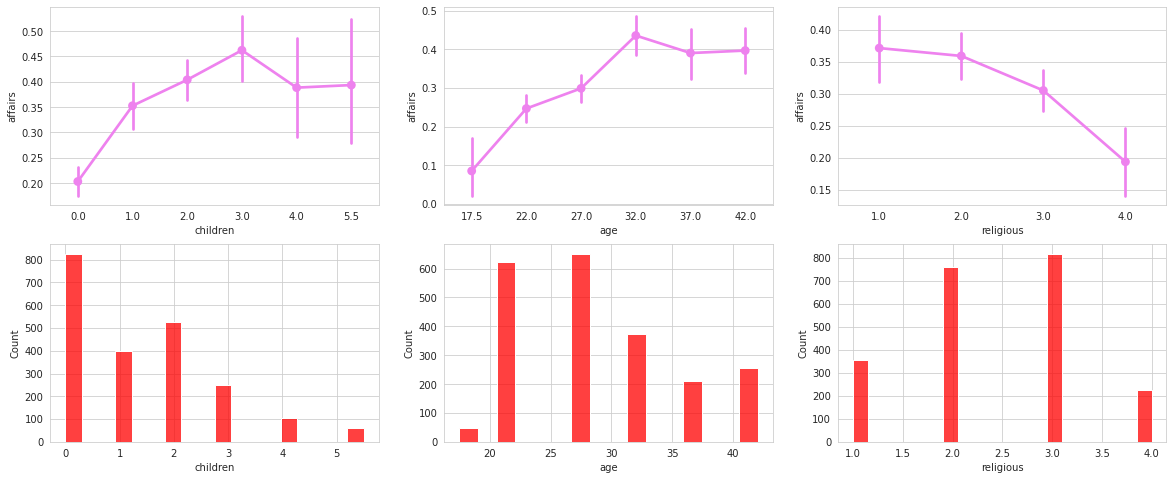

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(20, 8))
sns.pointplot(x=X_train['children'], y=Y_train, color='violet', ax=axis[0, 0])
sns.pointplot(x=X_train['age'], y=Y_train, color='violet', ax=axis[0, 1])
sns.pointplot(x=X_train['religious'], y=Y_train, color='violet', ax=axis[0, 2])
sns.histplot(X_train['children'], ax=axis[1, 0], color='red')
sns.histplot(X_train['age'], ax=axis[1, 1], color='red')
sns.histplot(X_train['religious'], ax=axis[1, 2], color='red')
plt.show()

All these features seem to show the character of a logistic regression graph. Higher the age and the number of children, more likely to have affairs. But there is a slight depth after some time. 

Affairs are less in case of religious couples.

Here the number of samples with children more than 3 is very less and they doesn't follow linearity.

Also, samples with age less than 20 is very less.

Out of curiosity, let us check how the rate of marriage changes with age.

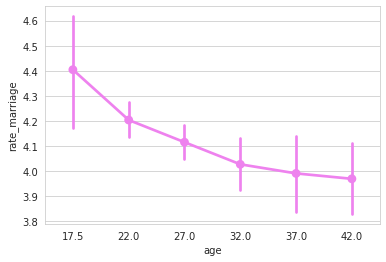

In [ ]:
sns.pointplot(x=X_train['age'], y=X_train['rate_marriage'], color='violet')
plt.show()

The rate of marriage is declining by age as shown in the graph.

For curiosity, let us also see the relationship between education and occupation.

<function matplotlib.pyplot.show>

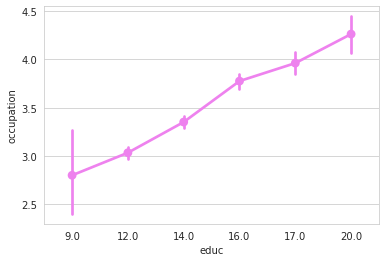

In [ ]:
sns.pointplot(x=X_train['educ'], y=X_train['occupation'], color='violet')
plt.show

This is obvious.

Occupation, Education, and occupation of husband are features that has shown less correlation here. Let us visualize them.

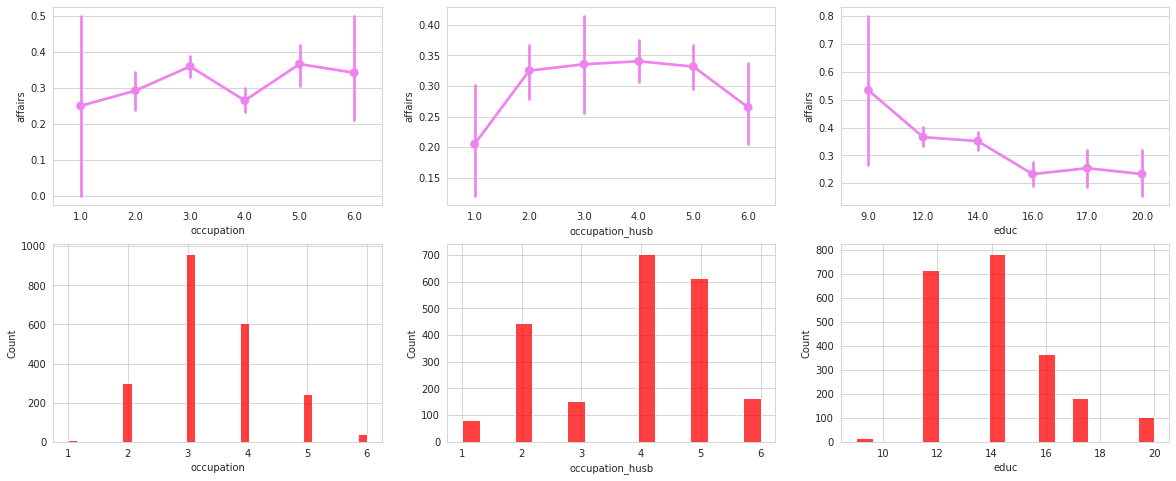

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(20, 8))
sns.pointplot(x=X_train['occupation'], y=Y_train, color='violet', ax=axis[0, 0])
sns.pointplot(x=X_train['occupation_husb'], y=Y_train, color='violet', ax=axis[0, 1])
sns.pointplot(x=X_train['educ'], y=Y_train, color='violet', ax=axis[0, 2])
sns.histplot(X_train['occupation'], ax=axis[1, 0], color='red')
sns.histplot(X_train['occupation_husb'], ax=axis[1, 1], color='red')
sns.histplot(X_train['educ'], ax=axis[1, 2], color='red')
plt.show()

Like shown in the correlation. They have very less significance in effect on affair rates. 

## **Data Cleaning**

These are what we observed from the visualization:

* The number of samples with rate_marriage as 1 is very less

* Here the number of samples with children more than 3 is very less and they don't follow linearity.

* Also, samples with age less than 20 is very less as well.

* occupation, occupation_husb and educ provides very less information

In [ ]:
# Removing outliers
indices_to_drop = []
indices_to_drop.extend(X_train[X_train['children'] > 3].index.values)

X_train.drop(indices_to_drop, inplace=True)
Y_train.drop(indices_to_drop, inplace=True)

Before going ahead with this, there is a need to make dummy columns. This is because most of the features are identified on the basis of numeric values. This might confuse the regression model as it might valuate the values with greater magnitude with the same value.

In [ ]:
# Removing less significant columns
X_train.drop(['occupation', 'occupation_husb', 'educ'], axis=1, inplace=True)

# Creating dummy columns
X_train_withDummy =  X_train.astype({'children': 'category', 'religious': 'category', 'rate_marriage': 'category'})
X_train_withDummy = pd.get_dummies(X_train_withDummy, drop_first=True)
X_train_withDummy.head()

,age,yrs_married,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,children_1.0,children_2.0,children_3.0,religious_2.0,religious_3.0,religious_4.0
2406,27.0,6.0,0,1,0,0,0,1,0,0,1,0
417,27.0,9.0,0,0,1,0,0,0,1,0,1,0
2323,22.0,2.5,0,0,1,0,0,0,0,0,1,0
4867,22.0,6.0,0,0,0,1,1,0,0,1,0,0
4448,22.0,2.5,0,0,0,1,0,0,0,0,1,0


## **Logistic Regression**

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

p = e^y/ 1 + e^y

In [ ]:
lr_withDummy = LogisticRegression(max_iter=1000, random_state=687)

In [ ]:
# Fitting the model
lr_withDummy.fit(X_train_withDummy, Y_train)

LogisticRegression(max_iter=1000, random_state=687)

In [ ]:
# Changing the test input for prediction
X_test_withDummy =  X_test.astype({'children': 'category', 'religious': 'category', 'rate_marriage': 'category'})
X_test_withDummy = pd.get_dummies(X_test_withDummy, drop_first=True)

#  Selecting columns
X_test_withDummy = X_test_withDummy[X_train_withDummy.columns]

In [ ]:
# prediction
pred_withDummy = lr_withDummy.predict(X_test_withDummy)

In [ ]:
# accuracy score
accuracy_score(pred_withDummy, Y_test)

0.725130890052356

### **Without dummy**

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=687)

In [ ]:
# Fitting the model
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=687)

In [ ]:
# Selcting columns
X_test = X_test[X_train.columns]

In [ ]:
# prediction
pred_withDummy = lr.predict(X_test)

In [ ]:
# accuracy score
accuracy_score(pred_withDummy, Y_test)

0.7158495954307472